In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import nltk
import math
import pickle

%matplotlib inline

### Load the data as a csv file

In [2]:
# data downloaded from kaggle https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
df_weather = pd.read_csv('weatherAUS.csv')

In [3]:
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df_weather.shape

(145460, 23)

In [5]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df_weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
#type(df_weather.Date)
import datetime
isinstance(df_weather.Date, datetime.date)

False

## Covert 'Date' column to a datetime object

In [9]:
#df_weather['Date'] = pd.to_datetime(df_weather['Date'],format='%yyyy-%mm-%dd')
df_weather['Date'] = df_weather['Date'].astype('datetime64')



/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/internals.py:3462: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


### Drop the 'RainToday' column from the dataframe: Most likely the project will involve predicting if it rains tomorrow rather than today

In [10]:
df_weather.drop(['RainToday'], axis=1,inplace=True)

In [11]:
df_weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainTomorrow             object
dtype: object

In [12]:
df_weather.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


### Create Month column for dataframe

In [13]:
df_weather['Month'] = df_weather.Date.dt.month

In [14]:
df_weather[['Date','Month']].tail(10)

,Date,Month
145450,2017-06-16,6
145451,2017-06-17,6
145452,2017-06-18,6
145453,2017-06-19,6
145454,2017-06-20,6
145455,2017-06-21,6
145456,2017-06-22,6
145457,2017-06-23,6
145458,2017-06-24,6
145459,2017-06-25,6


In [15]:
df_weather.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainTomorrow             object
Month                     int64
dtype: object

In [16]:
df_weather.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [17]:
#df_weather.RainToday.value_counts()

In [18]:
df_weather.Month.value_counts()

3     13361
5     13353
1     13236
6     12684
10    12028
8     12028
7     12025
11    11669
9     11640
4     11550
12    11093
2     10793
Name: Month, dtype: int64

In [19]:
df_weather.Location.value_counts()

Canberra            3436
Sydney              3344
Perth               3193
Brisbane            3193
Hobart              3193
Melbourne           3193
Adelaide            3193
Darwin              3193
Wollongong          3040
Albury              3040
Albany              3040
Launceston          3040
MountGambier        3040
Cairns              3040
AliceSprings        3040
Ballarat            3040
Bendigo             3040
Townsville          3040
GoldCoast           3040
MountGinini         3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
CoffsHarbour        3009
Woomera             3009
MelbourneAirport    3009
PearceRAAF          3009
Williamtown         3009
NorfolkIsland       3009
Mildura             3009
Witchcliffe         3009
Watsonia            3009
Richmond            3009
SydneyAirport       3009
Sale                3009
Moree               3009
Portland            3009
PerthAirport        3009
Dartmoor            3009
WaggaWagga          3009


## Locate Nan Values in weather data

In [20]:
df_weather.columns[df_weather.isna().any()].tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [21]:
# count the Nan values for each column in dataframe
df_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
Month                0
dtype: int64

## There are a lot on Nan values in almost all the columns: How to deal with this issue?

## Plots

### scatterplot: evaporation vs. humidity at 3 PM

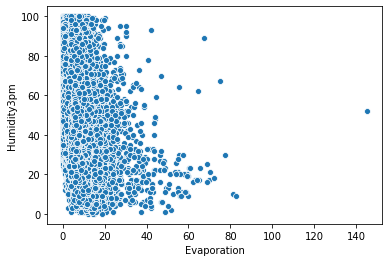

In [22]:
sns.scatterplot(data=df_weather, x="Evaporation", y="Humidity3pm")

### scatterplot: evaporation vs Max Temperature

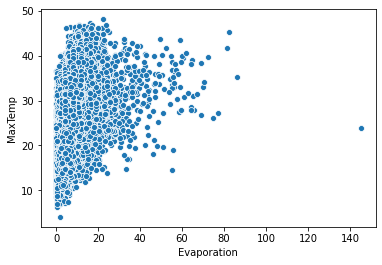

In [23]:
sns.scatterplot(data=df_weather, x="Evaporation", y="MaxTemp")

### Correlation of Numerical Features in the Data

In [24]:
df_weather.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906,-0.203833
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503,-0.163884
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657,-0.031371
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.026805
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501,0.024327
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748,0.061026
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569,0.051277
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778,0.060373
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399,-0.090759
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841,-0.018858


## Heatmap of Correlation of Data Features

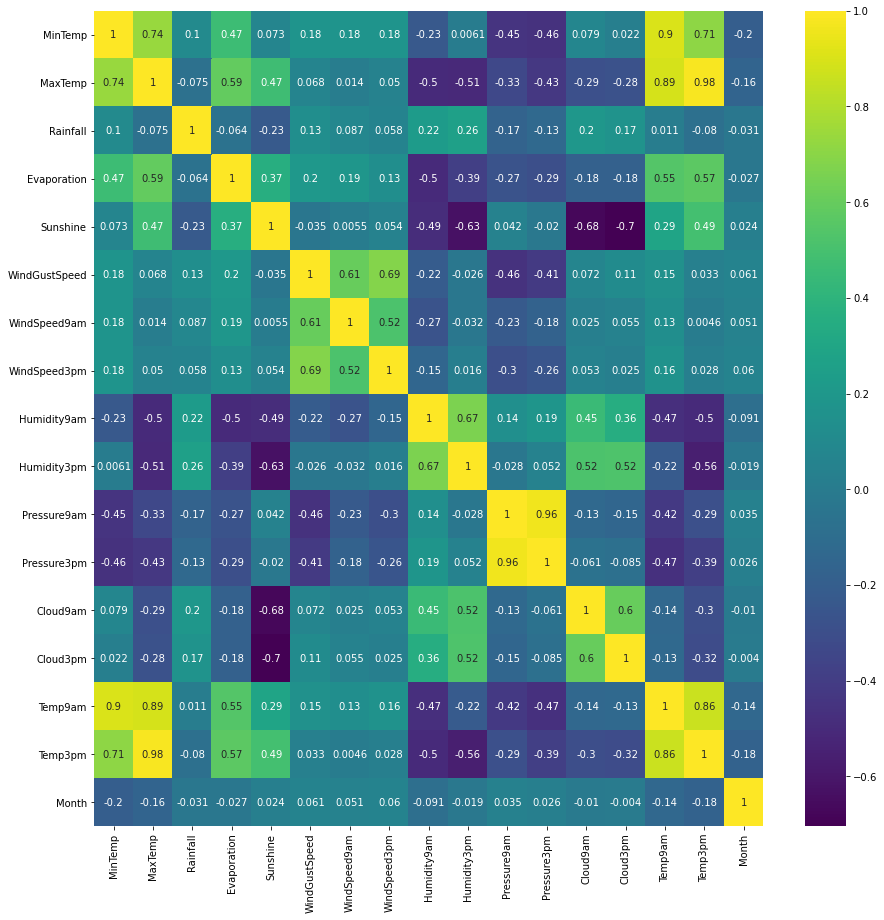

In [25]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_weather.corr(),annot = True, cmap = 'viridis')
plt.show()

In [26]:
#groupby 'Location' and determine mean MaxTemp for each Location
# sort by descending values, from high to low, select top 10 hottest locations
df_weather.groupby('Location')['MaxTemp'].mean().sort_values(ascending=False)[0:15]

Location
Katherine       34.935436
Darwin          32.540977
Uluru           30.383195
Cairns          29.558849
Townsville      29.367160
AliceSprings    29.248420
Moree           26.950548
Woomera         26.596707
Brisbane        26.448380
PearceRAAF      26.051238
Cobar           25.870093
GoldCoast       25.767062
PerthAirport    25.533234
Perth           25.034837
Mildura         24.840944
Name: MaxTemp, dtype: float64

### Barplot of Average Max Temperature for each Location

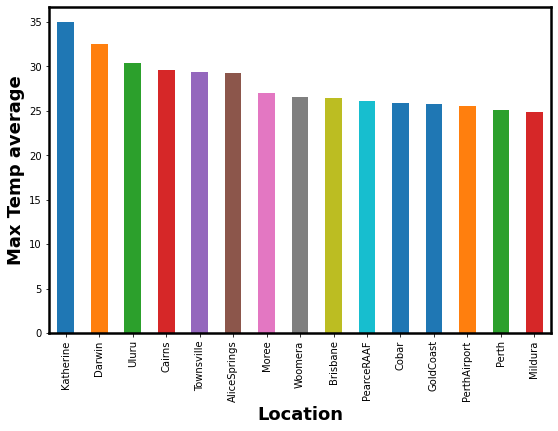

In [27]:

fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.xlabel('Location',fontsize=18,fontweight='bold')
plt.ylabel('Max Temp average',fontsize=18,fontweight='bold')
    
df_weather.groupby('Location')['MaxTemp'].mean().sort_values(ascending=False)[0:15].plot(kind='bar')

In [28]:
df_weather.groupby('Month')['MaxTemp'].mean().sort_values(ascending=False)

Month
1     29.532383
2     28.873509
12    27.558321
3     26.885273
11    26.181247
4     23.625035
10    23.537153
9     20.752012
5     20.065173
8     18.241013
6     17.307648
7     16.744580
Name: MaxTemp, dtype: float64

### Barplot of average Maximum Temperature for Month of the year

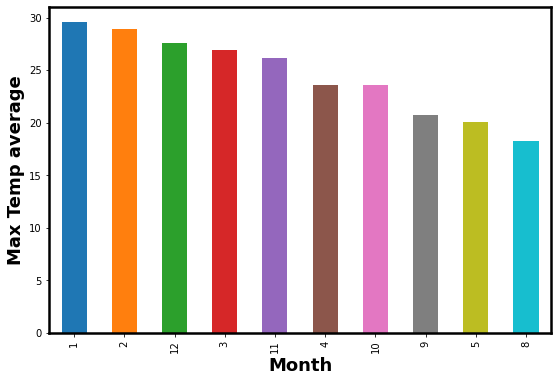

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.xlabel('Month',fontsize=18,fontweight='bold')
plt.ylabel('Max Temp average',fontsize=18,fontweight='bold')
df_weather.groupby('Month')['MaxTemp'].mean().sort_values(ascending=False)[0:10].plot(kind='bar')

### January & February are the hottest months in Australia

### Barplot of Average Maximum Temperature for Location: Katherine is the hottest location on average

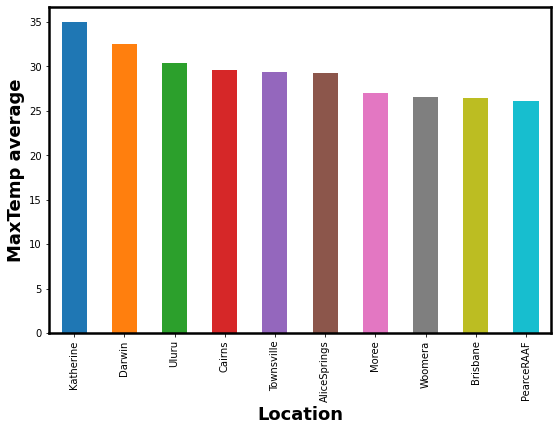

In [30]:
#groupby 'Location' and determine mean MaxTemp for each Location
# sort by descending values, from high to low, select top 10 hottest locations
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.xlabel('Location',fontsize=18,fontweight='bold')
plt.ylabel('MaxTemp average',fontsize=18,fontweight='bold')
df_weather.groupby('Location')['MaxTemp'].mean().sort_values(ascending=False)[0:10].plot(kind='bar')

In [31]:
df_weather.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)[0:10]

Location
Cairns          5.742035
Darwin          5.092452
CoffsHarbour    5.061497
GoldCoast       3.769396
Wollongong      3.594903
Williamtown     3.591108
Townsville      3.485592
NorahHead       3.387299
Sydney          3.324543
MountGinini     3.292260
Name: Rainfall, dtype: float64

### Barplot of average rainfall for each location: Cairns has the most rain in Australia

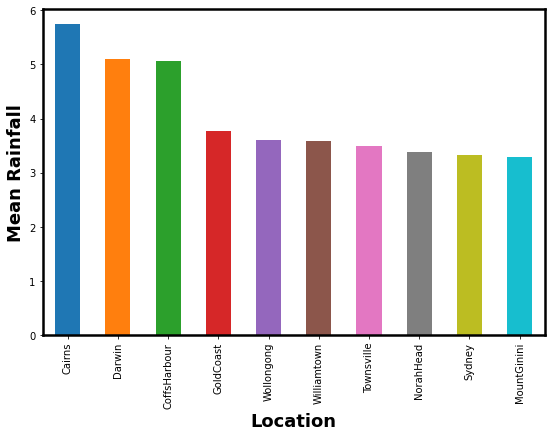

In [32]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.xlabel('Location',fontsize=18,fontweight='bold')
plt.ylabel('Mean Rainfall',fontsize=18,fontweight='bold')
df_weather.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)[0:10].plot(kind='bar')

In [33]:
df_weather.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)

Month
2     3.188665
3     2.814450
6     2.782182
1     2.738478
12    2.491835
4     2.334823
11    2.268177
7     2.184209
8     2.034983
5     2.001654
9     1.888543
10    1.614732
Name: Rainfall, dtype: float64

### Barplot of average rainfall for each month of the year: the months of February & March have the most rain in Australia

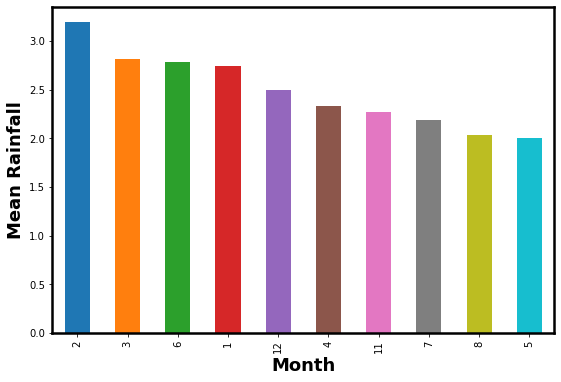

In [34]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
plt.xlabel('Month',fontsize=18,fontweight='bold')
plt.ylabel('Mean Rainfall',fontsize=18,fontweight='bold')
df_weather.groupby('Month')['Rainfall'].mean().sort_values(ascending=False)[0:10].plot(kind='bar')

### A quick comparison of average Max Temp & average rainfall for each location in Australia: there does not seem to be a relationship between the two features as some of the hotter locations have more rainfall on average than some of the colder locations

In [35]:
# determine mean rainfall & maxTemp for each location in data
df_weather.groupby('Location')['MaxTemp','Rainfall'].mean().sort_values(by=['MaxTemp'],ascending=True)[0:15]

,MaxTemp,Rainfall
Location,,
MountGinini,11.663676,3.292260
Hobart,17.865727,1.601819
Portland,18.055053,2.530374
Ballarat,18.287266,1.740026
Launceston,18.954911,2.011988
Dartmoor,19.697454,2.146567
MountGambier,19.828995,2.087562
Albany,20.070998,2.263859
Sale,20.282281,1.510167
